#Table of Contents
* [1. IPython and its Notebook](#1.-IPython-and-its-Notebook)
* [2. Quick start – our typical setup](#2.-Quick-start-–-our-typical-setup)
	* [2.1 Some additional examples in [GitHub](https://github.com/ipython/ipython/tree/1.x/examples/notebooks)](#2.1-Some-additional-examples-in-[GitHub]%28https://github.com/ipython/ipython/tree/1.x/examples/notebooks%29)
		* [2.1.1 Markdown cells](#2.1.1-Markdown-cells)
		* [2.1.2 Embedded code](#2.1.2-Embedded-code)
		* [2.1.3 LaTeX equations](#2.1.3-LaTeX-equations)
* [3. Generation of random numbers](#3.-Generation-of-random-numbers)
	* [3.1 Autocomplete and dynamic object introspection](#3.1-Autocomplete-and-dynamic-object-introspection)
		* [3.1.1 Generation of random gaussian numbers](#3.1.1-Generation-of-random-gaussian-numbers)
		* [3.1.2 Plotting library](#3.1.2-Plotting-library)
	* [3.2 Define histogram binning](#3.2-Define-histogram-binning)
	* [3.3 Plotting with Matplotlib](#3.3-Plotting-with-Matplotlib)


In [1]:
from IPython.display import Image

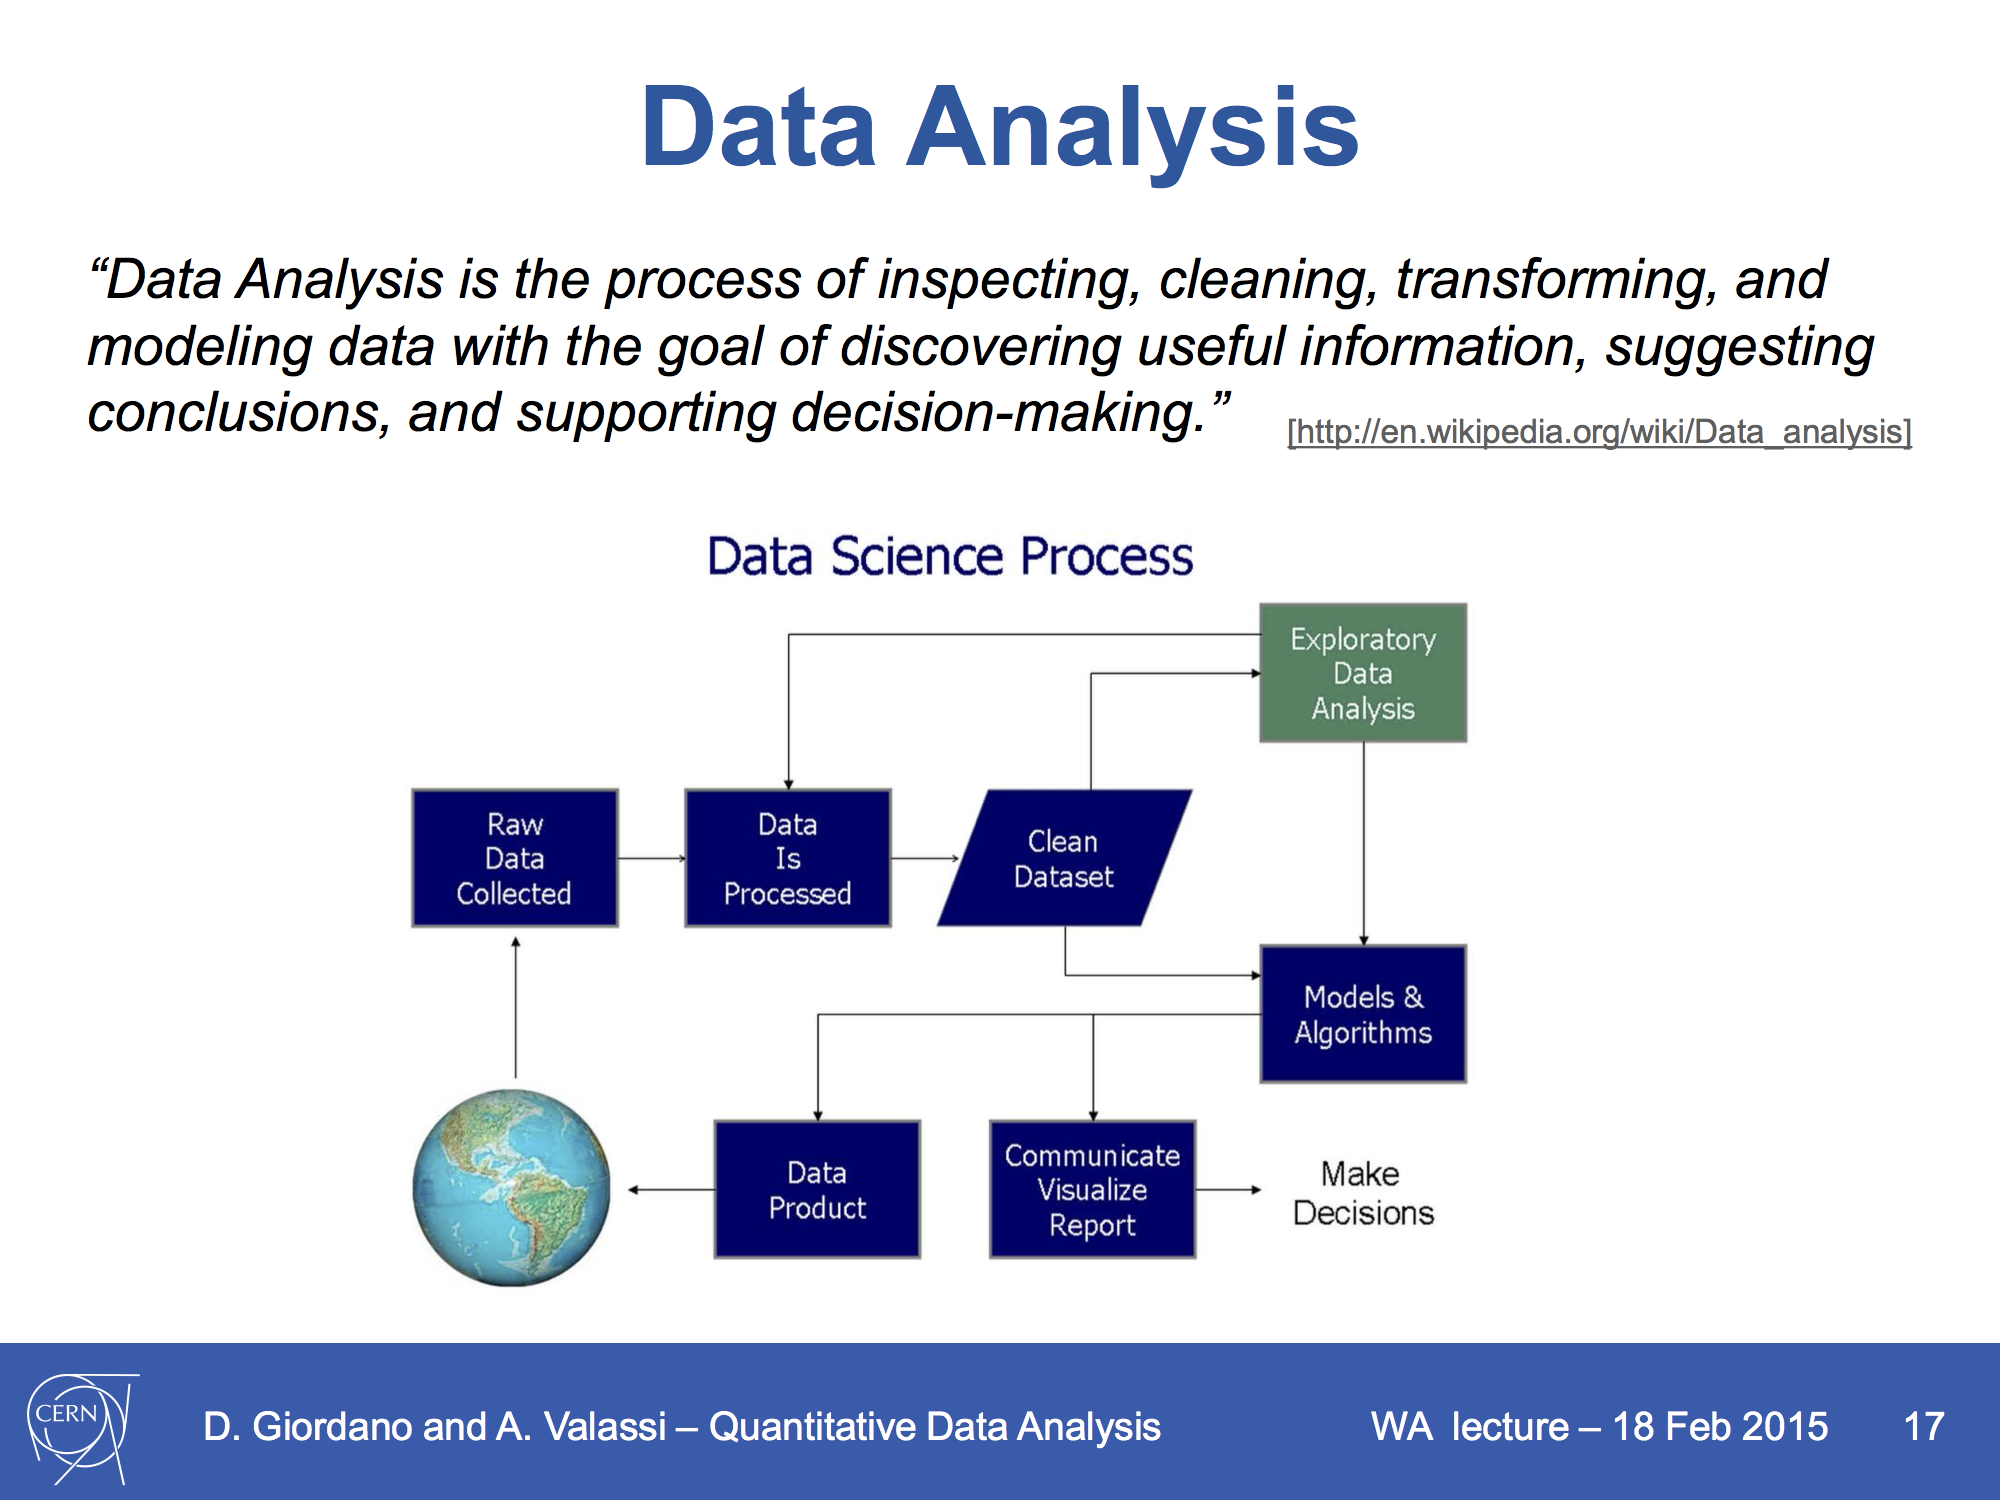

In [2]:
Image(filename='slides/WA_slide_17.png',width=800)

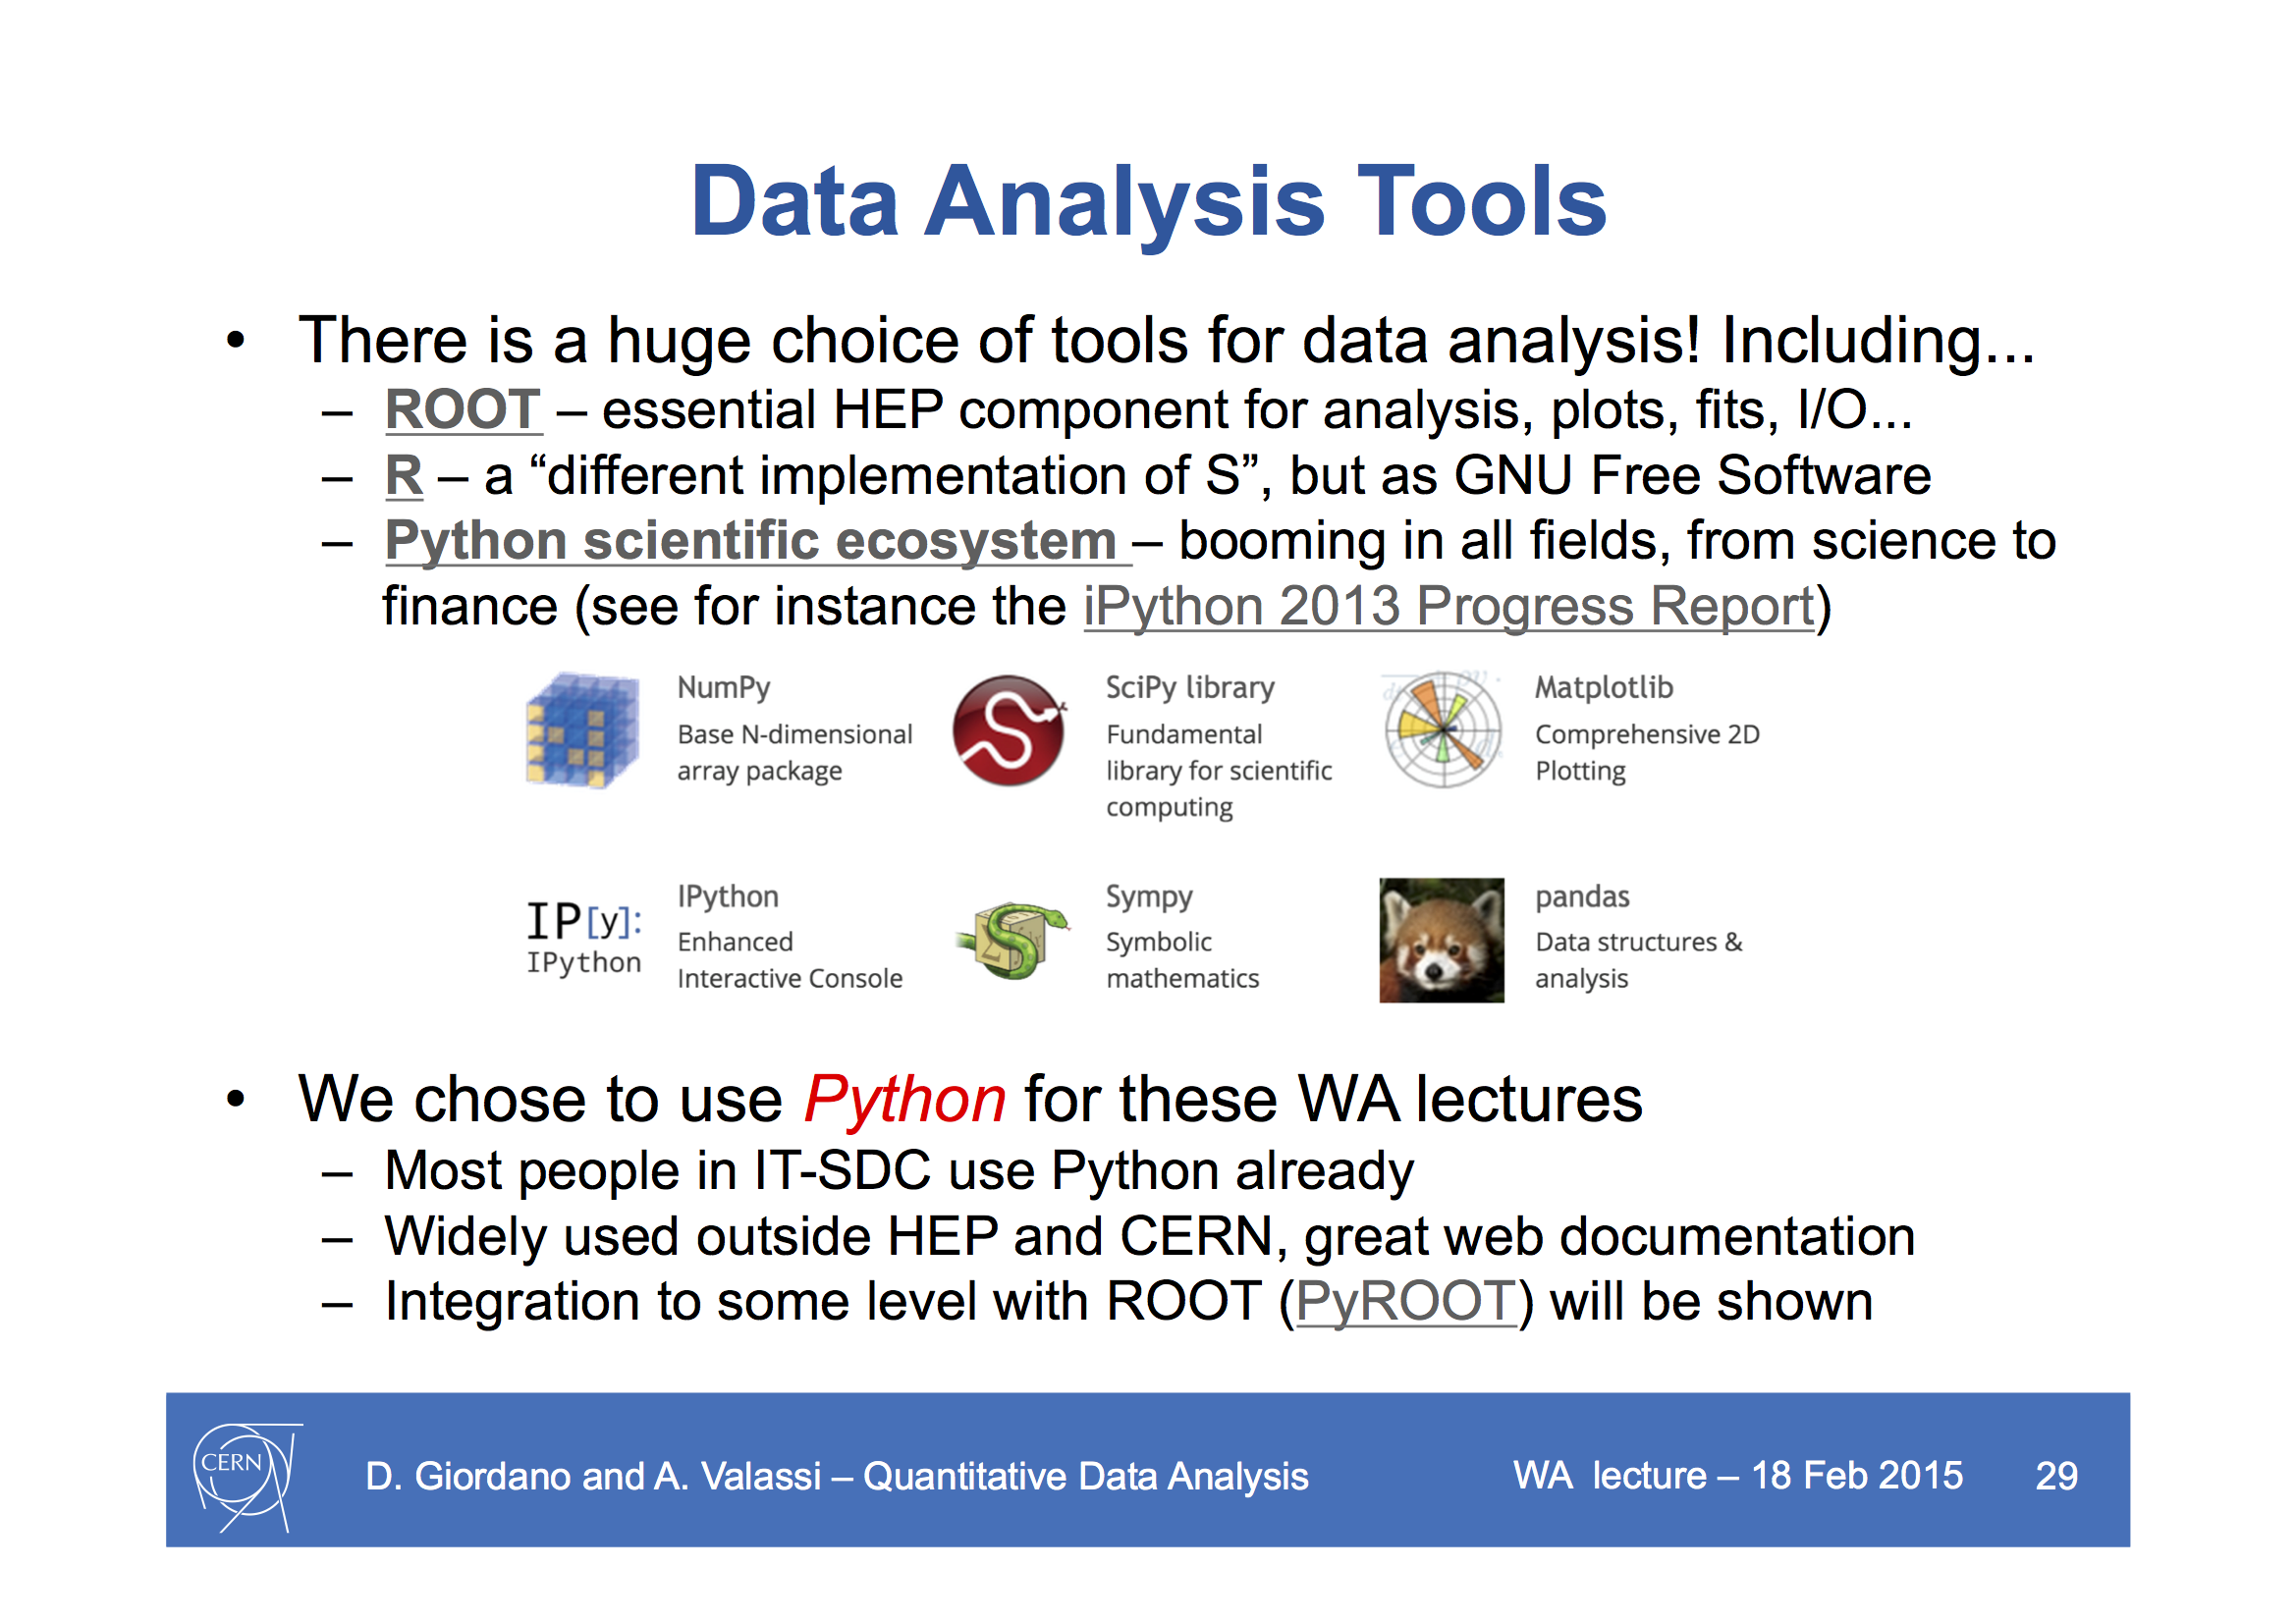

In [3]:
Image(filename='slides/WA_slide_29.png',width=800)

# 1. IPython and its Notebook

- IPython provides a rich architecture for interactive computing
   - Interactive shells (terminal and Qt-based) and data visualization
   - Easy to use, high performance tools for parallel computing
   - A browser-based [notebook](http://ipython.org/notebook.html) with support for code, text, mathematical expressions, inline plots and other rich media


- Extensive documentation on the web
   - Entry point: [IPython's website](http://ipython.org)
   - Tutorials, videos, talks, book, mailing lists, chat room
   - A lot of documentation is written in IPython and available in GitHub
        - Shared through [nbviewer](http://nbviewer.ipython.org/) 
        - Suggested lectures on scientific computing with Python
            - [Mining the social web](http://nbviewer.ipython.org/github/ptwobrussell/Mining-the-Social-Web-2nd-Edition/tree/master/ipynb/)
            - [Probabilistic programming and Bayesian methods for hackers](http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb)

# 2. Quick start – our typical setup

- Server: any CC7 (CERN CentOS7) node
    - Python 2.7 (native)
    - IPython, numpy, scipy, matplotlib, pandas (via easy_install) 
    - ROOT(from AFS)


- Client: any web browser
    - Either on the local server where iPython is running 
        - *ipython notebook*
    - Or with port forwarding via ssh/putty on a remote client 
        - *ssh -Y -L 8888:localhost:8888  **your_server** *
        - *ipython notebook –no-browser*


- Further reading on how to configure the notebook [here](http://nbviewer.ipython.org/github/ipython/ipython/blob/2.x/examples/Index.ipynb)

## 2.1 Some additional examples in [GitHub](https://github.com/ipython/ipython/tree/1.x/examples/notebooks)

### 2.1.1 Markdown cells

### 2.1.2 Embedded code

You can embed code meant for illustration instead of execution in Python:

    def f(x):
        """a docstring"""
        return x**2

or other languages:

    if (i=0; i<n; i++) {
      printf("hello %d\n", i);
      x += 4;
    }

### 2.1.3 LaTeX equations

- include mathematical expressions   
    $ e^{i\pi} + 1 = 0 $  

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

# 3. Generation of random numbers

Documentation
1. [matplotlib]( http://matplotlib.org/examples/pylab_examples/index.html )
1. [numpy random numbers]( http://docs.scipy.org/doc/numpy/reference/routines.random.html )
1. [scipy stats]( https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html )

In [1]:
from scipy import stats
import numpy as np


## 3.1 Autocomplete and dynamic object introspection

In [5]:
stats.norm()

In [3]:
stats.norm.rvs(loc=2,scale=5,size=(2,3))

array([[ 0.84218751,  0.40026408,  3.09087802],
       [-3.64246772,  1.28978304, -0.18885291]])

### 3.1.1 Generation of random gaussian numbers

In [13]:
{# Generate gaussian random numbers
np.random.seed(1234)
mu, sigma = 100, 15
data = np.random.normal(loc=mu,scale=sigma,size=10000)

# Get mean and std of sample
data_mean = np.round(np.mean(data),2)
data_std = np.round(np.std(data),2)}

In [18]:
print data

[ 107.07152746   82.13536458  121.49060453 ...,   84.2130896    92.5346035
   96.15990702]


In [19]:
print data_mean

100.24


In [15]:
print data_std

14.93


### 3.1.2 Plotting library

In [20]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [21]:
#In order to change the matplotlib image format, uncomment the following lines
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

## 3.2 Define histogram binning

In [22]:
# Define histogram binning
bin_size = 5; min_edge = 0; max_edge = 200
Nbins = int(round((max_edge-min_edge)/bin_size))
Nedges = Nbins + 1
bin_list = np.linspace(min_edge, max_edge, Nedges)

## 3.3 Plotting with Matplotlib

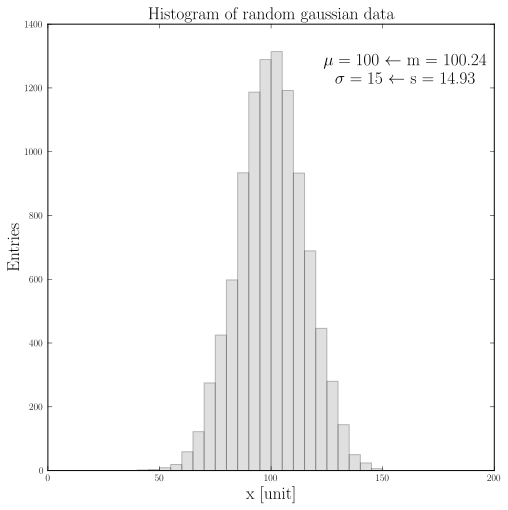

In [23]:
#This part is just for rendering plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# the histogram of the data
n, bin, patch = ax.hist(data, bins=bin_list, facecolor='gray', alpha=0.25)

# add labels to axis to explain the histogram content
plt.xlabel('x [unit]',fontsize = 'xx-large')
plt.ylabel('Entries',fontsize = 'xx-large')
plt.title('Histogram of random gaussian data',fontsize = 'xx-large')

# add statistics
plt.text(0.8, 0.9,
        '$\mu = %s$ $\leftarrow$ \t m = %s\n$\sigma = %s$ $\leftarrow$ \t s = %s' % 
        (mu, data_mean, sigma, data_std),
         horizontalalignment='center',
         verticalalignment='center',
         fontsize = 'xx-large',
         transform = ax.transAxes)

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
